In [2]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [36]:
fandango=pd.read_csv('E:\\Machine_learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\06-Capstone-Project\\fandango_scrape.csv')

In [7]:
fandango

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [8]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

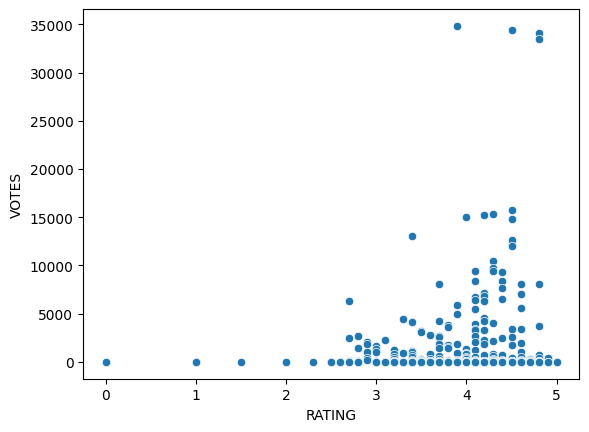

In [12]:
sn.scatterplot(data=fandango,y='VOTES',x='RATING')

In [16]:
numeric_df=fandango.select_dtypes('number')
numeric_df.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [17]:
#getting the year
title='Film Title Name (Year)'
title.split('(')

['Film Title Name ', 'Year)']

In [18]:
title='Film Title Name (Year)'
title.split('(')[-1]

'Year)'

In [19]:
title='Film Title Name (Year)'
title.split('(')[-1].replace(')','')

'Year'

In [24]:
fandango['Year']=fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [25]:
fandango.head()

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [31]:
#can also be done using a function
def get_year(title):
    return title.split('(')[-1].replace(')','')

In [32]:
fandango['Year']=fandango['FILM'].apply(get_year)

In [33]:
fandango

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [37]:
#count of movies per year
fandango['Year'].value_counts()

Year
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

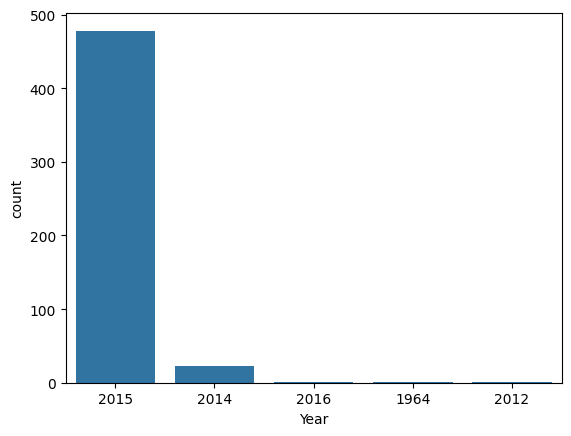

In [38]:
#count of movies per year-visualization
sn.countplot(data=fandango,x='Year')

In [39]:
#what are 10 movies with highest numbe rof votes
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [41]:
#number of movies with 0 votes
no_votes=fandango["VOTES"]==0

In [42]:
no_votes.sum()

69

In [43]:
#or
fandango[fandango["VOTES"]==0]

,FILM,STARS,RATING,VOTES,Year
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [46]:
#create dataframe with only the movies having reviews
fan_reviewed=fandango[fandango["VOTES"]>0]

In [45]:
fan_reviewed

,FILM,STARS,RATING,VOTES,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


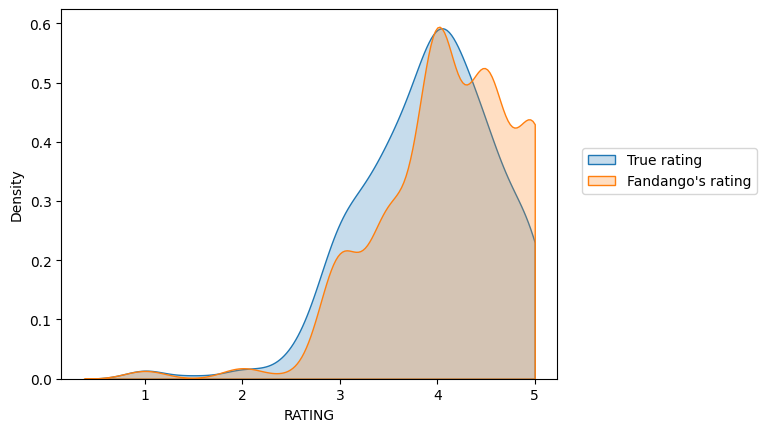

In [52]:
#visualization
sn.kdeplot(data=fan_reviewed,x="RATING",clip=[0,5],fill=True,label="True rating")
sn.kdeplot(data=fan_reviewed,x="STARS",clip=[0,5],fill=True,label="Fandango's rating")
plt.legend(loc=(1.05,0.5))

In [53]:
#calculate the difference between fandango's rating and true rating

In [54]:
fan_reviewed['Diff']=fan_reviewed["STARS"]-fan_reviewed['RATING']

C:\Users\lekha\AppData\Local\Temp\ipykernel_14888\1536563356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['Diff']=fan_reviewed["STARS"]-fan_reviewed['RATING']


In [55]:
fan_reviewed

,FILM,STARS,RATING,VOTES,Year,Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


In [56]:
fan_reviewed['Diff']=fan_reviewed['Diff'].round(2)

C:\Users\lekha\AppData\Local\Temp\ipykernel_14888\2785254021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['Diff']=fan_reviewed['Diff'].round(2)


In [57]:
fan_reviewed['Diff']

0      0.1
1      0.0
2      0.2
3      0.2
4      0.0
      ... 
430    0.0
431    0.0
432    0.0
433    0.0
434    0.0
Name: Diff, Length: 435, dtype: float64

In [58]:
fan_reviewed

,FILM,STARS,RATING,VOTES,Year,Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<Axes: xlabel='Diff', ylabel='count'>

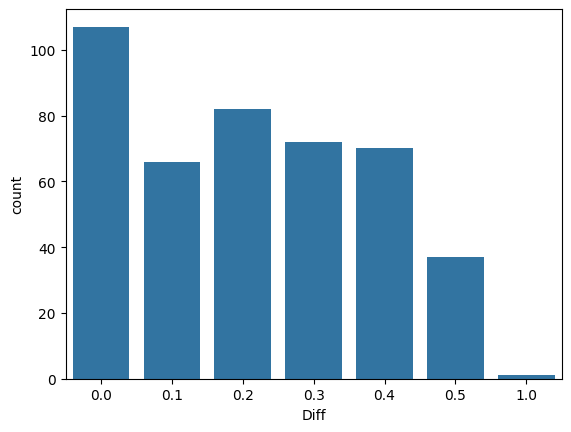

In [59]:
#countplot to see how many times the difference has occured
sn.countplot(data=fan_reviewed,x='Diff')

In [60]:
fan_reviewed[fan_reviewed['Diff']==1]

,FILM,STARS,RATING,VOTES,Year,Diff
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [1]:
#COmparision of Fandango Ratings With Other Sites

In [3]:
all_sites=pd.read_csv('E:\\Machine_learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\06-Capstone-Project\\all_sites_scores.csv')

<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

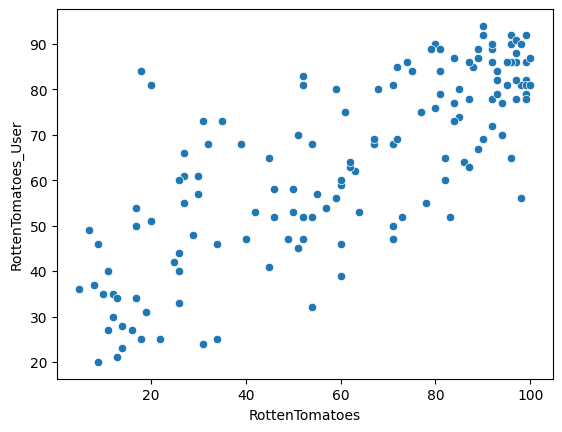

In [5]:
sn.scatterplot(data=all_sites,x='RottenTomatoes',y=	'RottenTomatoes_User')	

In [4]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [9]:
all_sites["Rotten_Diff"]=all_sites["RottenTomatoes"]-all_sites["RottenTomatoes_User"]

In [10]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


In [11]:
#calculate the absolute mean difference between RT scores n RT user scores

In [12]:
all_sites["Rotten_Diff"].apply(abs).mean()

15.095890410958905

In [13]:
#Plot the distribution of the difference b/w RT critic score n RT User score

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

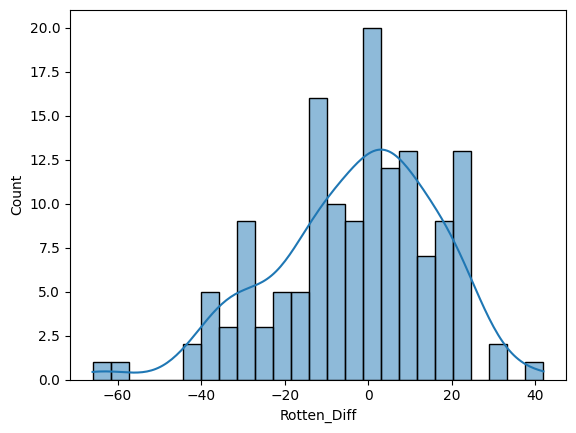

In [15]:
sn.histplot(data=all_sites,x="Rotten_Diff",kde=True,bins=25)

In [16]:
#top 5 movies users rated higher than critics on average

In [18]:
all_sites.nsmallest(5,"Rotten_Diff")["FILM"]

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

In [19]:
#top 5 movies critics rated higher than users on average

In [20]:
all_sites.nlargest(5,"Rotten_Diff")['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

In [21]:
#MetaCritic

<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

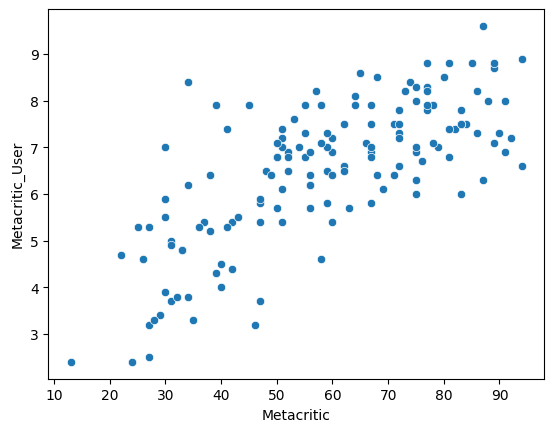

In [22]:
sn.scatterplot(data=all_sites,x='Metacritic',y=	'Metacritic_User')	

In [24]:
#IMDB

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

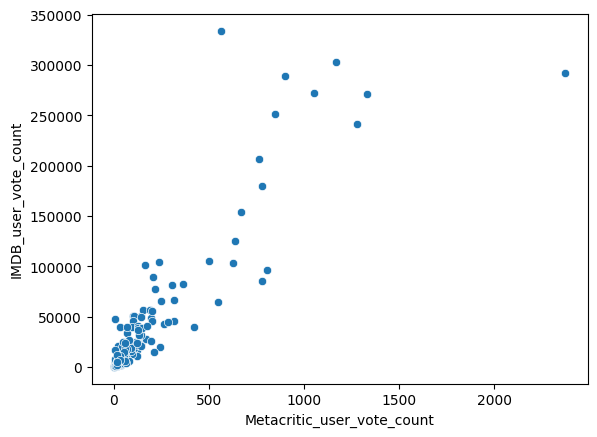

In [26]:
sn.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')	

In [27]:
#outliers

In [32]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [33]:
all_sites.nlargest(1,'Metacritic_user_vote_count')


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [34]:
#Fandago v/s All Sites

In [37]:
df=pd.merge(fandango,all_sites,on='FILM',how='inner')

In [38]:
df

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,95,86,86,7.3,7.4,14,696,9


In [39]:
#Normalize columns to Fandango Stars and Ratings

In [40]:
df['RT_Norm']=np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm']=np.round(df['RottenTomatoes_User']/20,1)

In [42]:
df['Meta_Norm']=np.round(df['Metacritic']/20,1)
df['MetaU_Norm']=np.round(df['Metacritic_User']/2,1)

In [44]:
df['IMDB_Norm']=np.round(df['IMDB']/2,1)

In [45]:
df

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,87,63,68,6.4,6.7,19,5289,24,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,95,81,87,6.3,7.0,18,1107,14,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,93,84,67,7.0,7.8,4,732,9,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,36,95,86,86,7.3,7.4,14,696,9,4.8,4.3,4.3,3.6,3.7


In [46]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm', 'IMDB_Norm'],
      dtype='object')

In [48]:
norm_scores=df[['STARS', 'RATING','RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm', 'IMDB_Norm']]

In [49]:
norm_scores

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


<Axes: ylabel='Density'>

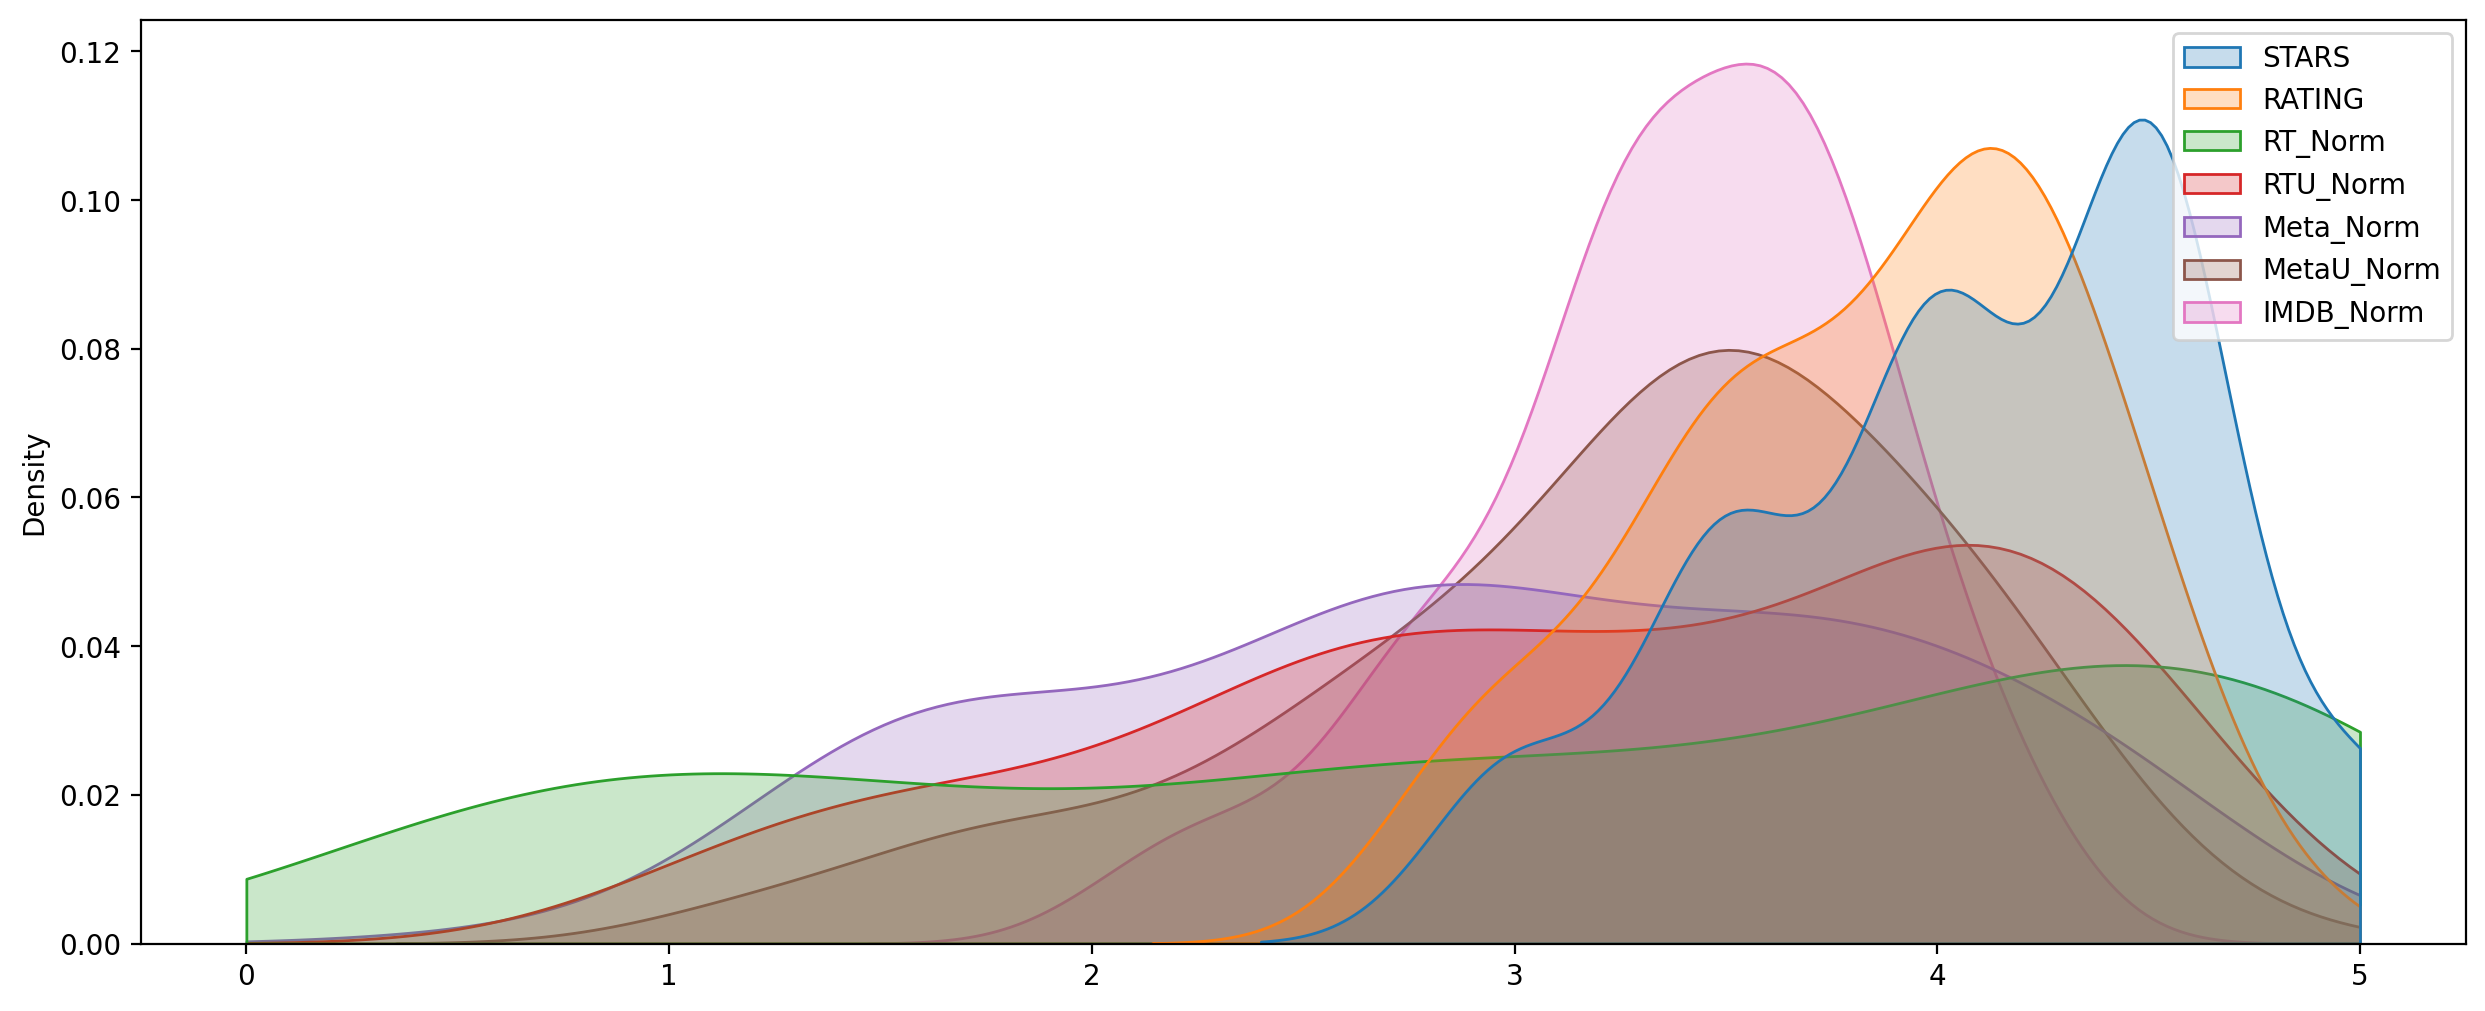

In [56]:
plt.figure(figsize=(15,6),dpi=200)
sn.kdeplot(data=norm_scores,clip=[0,5],fill=True)

In [64]:
#RT critic ratings v/s fandango star rating

<Axes: ylabel='Density'>

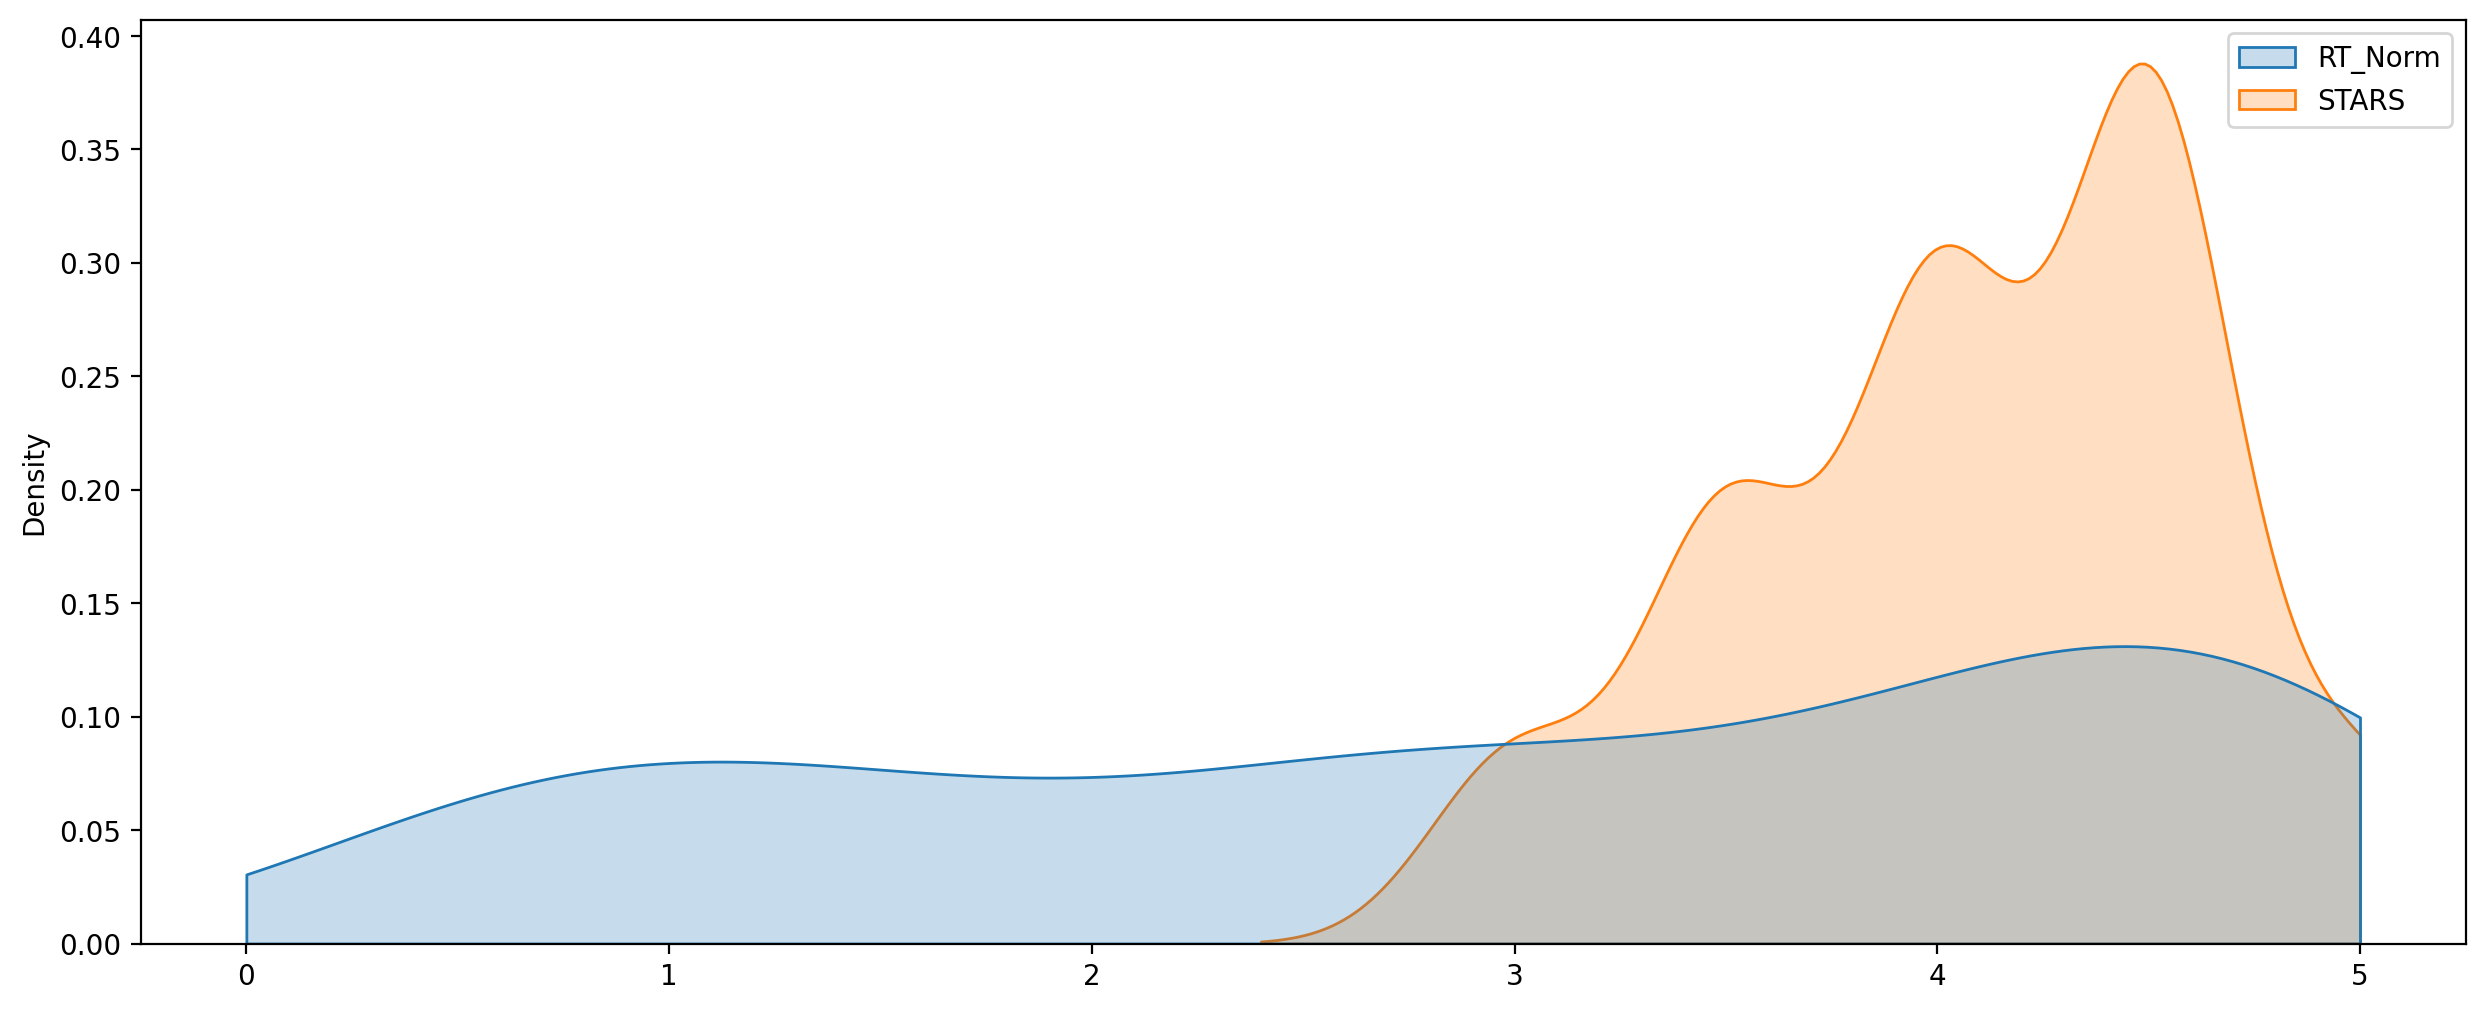

In [65]:
plt.figure(figsize=(15,6),dpi=200)
sn.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],fill=True)

In [67]:
#How are the worst movies rated across all platoforms?

<Figure size 2000x4000 with 0 Axes>

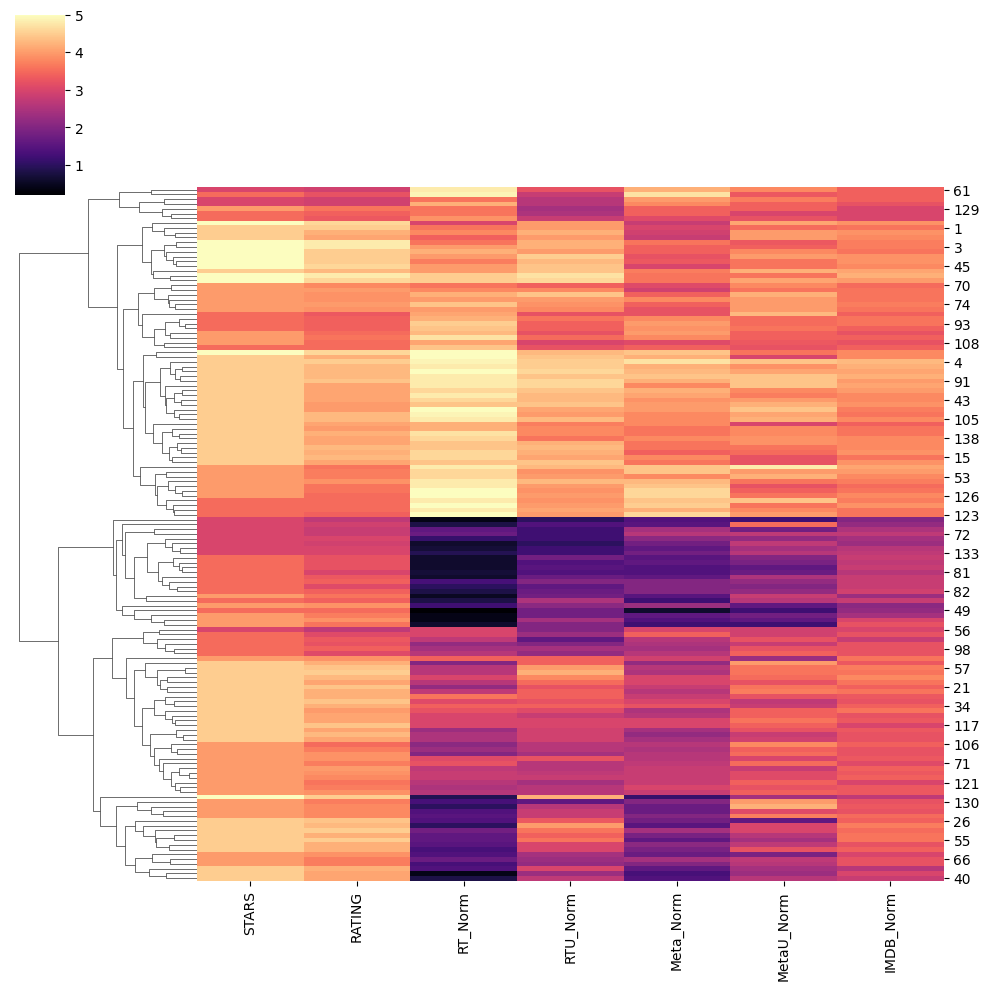

In [70]:
plt.figure(figsize=(10,20),dpi=200)
sn.clustermap(norm_scores,cmap='magma',col_cluster=False)

In [71]:
norm_scores.columns

Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm',
       'IMDB_Norm'],
      dtype='object')

In [73]:
norm_films=df[['FILM','STARS', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'MetaU_Norm',
       'IMDB_Norm']]

In [74]:
norm_films

,FILM,STARS,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,4.8,4.3,4.3,3.6,3.7


In [76]:
worst_films=norm_films.nsmallest(10,'RT_Norm')

In [77]:
worst_films

,FILM,STARS,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,0.6,1.4,1.6,1.9,2.7


<Axes: ylabel='Density'>

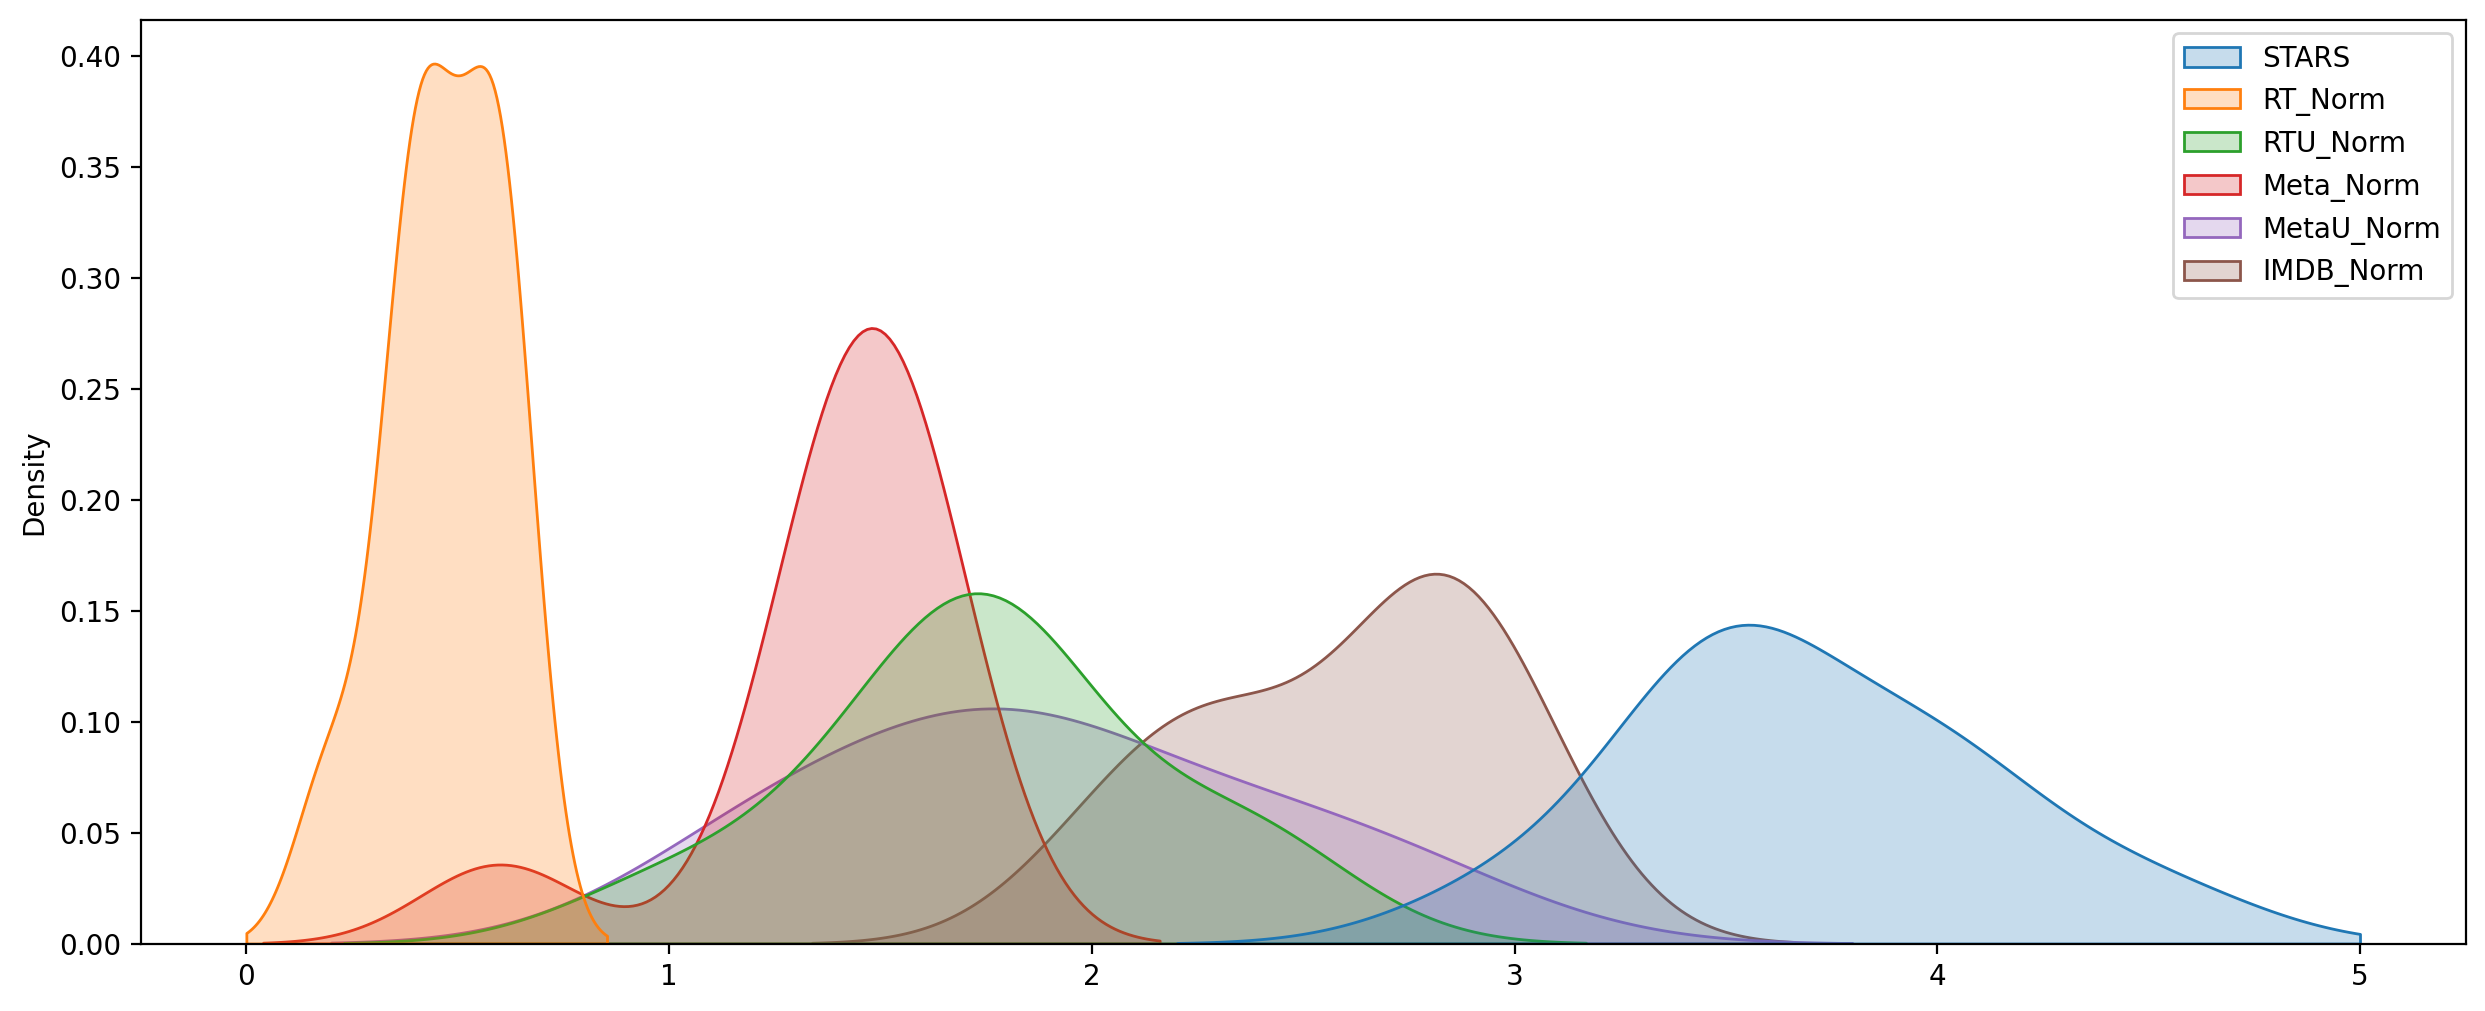

In [78]:
plt.figure(figsize=(15,6),dpi=200)
sn.kdeplot(data=worst_films,clip=[0,5],fill=True)

In [79]:
worst_films

,FILM,STARS,RT_Norm,RTU_Norm,Meta_Norm,MetaU_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,0.6,1.4,1.6,1.9,2.7
